

# Field data inversion ("Koenigsee")

This minimalistic example shows how to use the Refraction Manager to invert
a field data set. Here, we consider the Koenigsee data set, which represents
classical refraction seismics data set with slightly heterogeneous overburden
and some high-velocity bedrock. The data file can be found in the [pyGIMLi
example data repository](https://github.com/gimli-org/example-data/blob/master/traveltime/koenigsee.sgt).


In [1]:
# We import pyGIMLi and the traveltime module.

import pygimli as pg
import pygimli.physics.traveltime as tt

The helper function `pg.getExampleData` downloads the data set to a temporary
location and loads it. Printing the data reveals that there are 714 data
points using 63 sensors (shots and geophones) with the data columns s (shot),
g (geophone), and t (traveltime). By default, there is also a validity flag.



In [2]:
data = pg.getExampleData("traveltime/koenigsee.sgt", verbose=True)
print(data)

06/09/23 - 21:59:19 - pyGIMLi - INFO - Looking for traveltime/koenigsee.sgt in gimli-org/example-data/
06/09/23 - 21:59:19 - pyGIMLi - INFO - Getting: /home/jcmefra/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt from https://raw.githubusercontent.com//gimli-org/example-data//master/traveltime/koenigsee.sgt


No module named 'tqdm'.
You need to install this optional dependency to use nice progressbar in jupyter notebook.
[:::::::::::::::::::::::::::::::::::: 100% ::::::::::::::::::::::::::::::::::::] 9844 of 9844 complete

06/09/23 - 21:59:19 - pyGIMLi - INFO - Reading /home/jcmefra/.cache/pygimli/example-data/gimli-org/example-data/master/traveltime/koenigsee.sgt (<function load at 0x7f038e1c6a70>)



md5: 641890bb17cb2bdf052cbc348669dfd0
Data: Sensors: 63 data: 714, nonzero entries: ['g', 's', 't', 'valid']


Let's have a look at the data in the form of traveltime curves.



[[<matplotlib.lines.Line2D at 0x7f038e0aa1d0>],

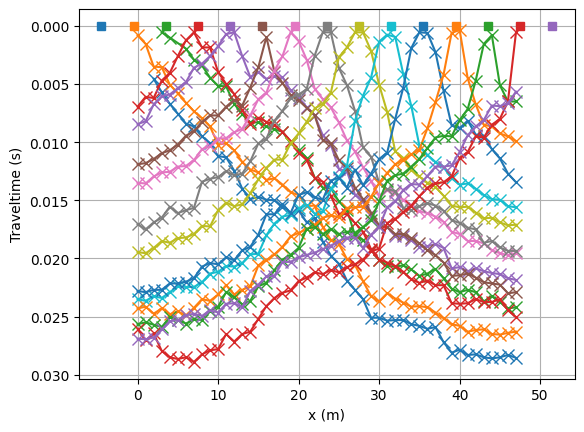

In [3]:
fig, ax = pg.plt.subplots()
tt.drawFirstPicks(ax, data)

We initialize the refraction manager.



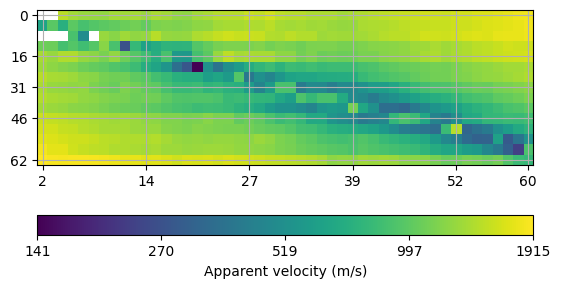

In [4]:
mgr = tt.TravelTimeManager(data)

# Alternatively, one can plot a matrix plot of apparent velocities which is the
# more general function also making sense for crosshole data.

ax, cbar = mgr.showData()

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly.



In [5]:
mgr.invert(secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=500, vBottom=5000, verbose=1)

./core/src/meshentities.cpp:36		GIMLI::Boundary* GIMLI::findBoundary_(const std::set<Boundary*>&)  pls. check, this should not happen.  There is more then one boundary defined.2
Boundary 0x55c0629d7150 rtti: 22 id: 0	N: 0 1  marker: 1 
Boundary 0x55c062b26460 rtti: 22 id: 126	N: 4 0  marker: -1 
06/09/23 - 21:59:20 - pyGIMLi - INFO - Found 1 regions.
06/09/23 - 21:59:20 - pyGIMLi - INFO - Found 1 regions.
06/09/23 - 21:59:20 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:96)
DataContainer has no "err" values. Fallback to 3%
06/09/23 - 21:59:20 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/09/23 - 21:59:20 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
06/09/23 - 21:59:20 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
06/09/23 - 21:59:20 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00181716 0.00170865 0.0017407  ... 0.00024375 0.0

Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  0

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  0

Statistics:

  Input vertices: 127
  Input segments: 128
  Input holes: 0

  Mesh vertices: 627
  Mesh triangles: 1090
  Mesh edges: 1716
  Mesh exterior boundary edges: 162
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 162

min/max(dweight) = 1153.4/95238.1
fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x7f038dfa3790>
Data transformation: <pgcore._pygimli_.RTrans object at 0x7f038df86d90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7

1090 [905.8543643939366,...,2650.6913731728523]

First have a look at the data fit.
Plot the measured (crosses) and modelled (lines) traveltimes.



[[<matplotlib.lines.Line2D at 0x7f038a483b20>],

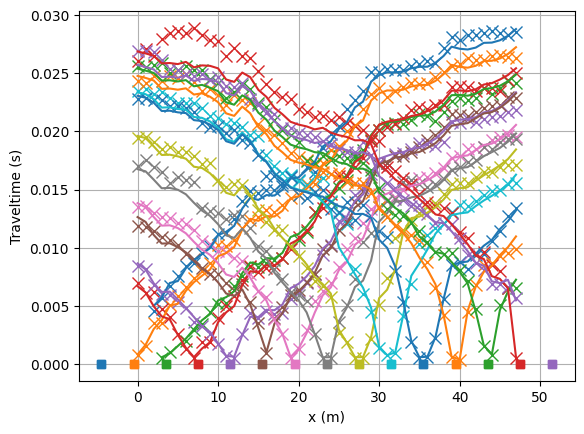

In [6]:
ax, cbar = mgr.showData(firstPicks=True, linewidth=0)
tt.drawFirstPicks(ax, data, mgr.inv.response, marker=None)

Show resulting tomogram along with fit. You may want to save your results.



'./20230906-21.59/TravelTimeManager'

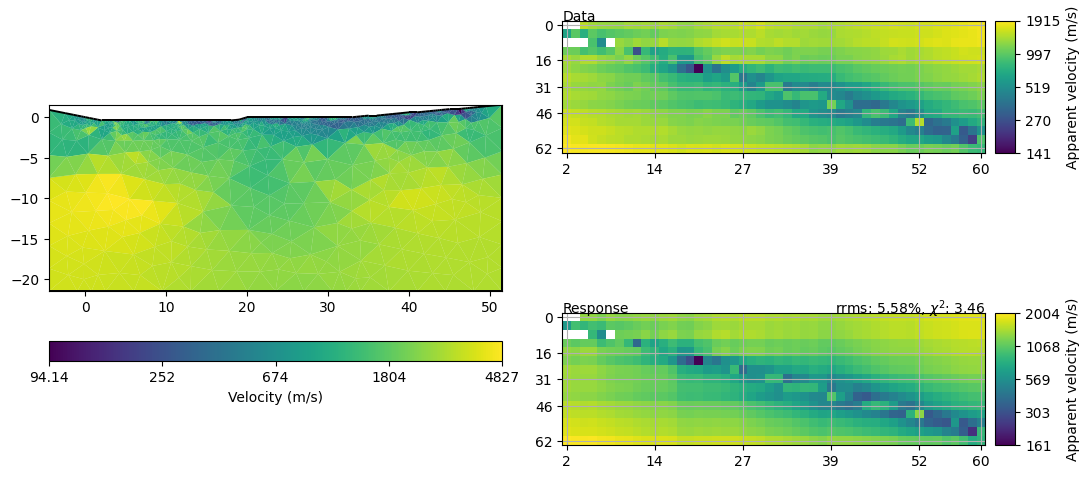

In [7]:
mgr.showResultAndFit()
mgr.saveResult()  # saves the results (mesh, velocity, vtk) in a folder

You can plot only the model and customize with a bunch of keywords



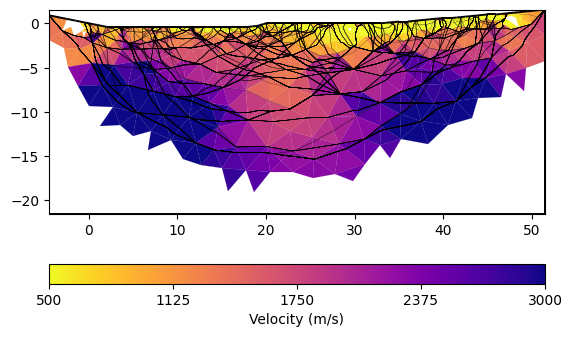

In [8]:
ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, cMap="plasma_r",
                          coverage=mgr.standardizedCoverage())
mgr.drawRayPaths(ax=ax, color="k", lw=0.3, alpha=0.5)

# mgr.coverage() yields the ray coverage in m and standardizedCoverage as 0/1

You can play around with the gradient starting model (`vTop` and `vBottom`
arguments) and the regularization strength `lam` and customize the mesh.

